In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='./data',train=True,download=False,transform=transform)
test_data = datasets.MNIST(root='./data',train=False,download=False,transform=transform)

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [28]:
#CNN構造理解
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.convl = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        #print(x.shape)
        x = F.relu(self.convl(x))
        #print(x.shape)
        x = F.max_pool2d(x,2,2)
        #print(x.shape)
        x = F.relu(self.conv2(x))
        #print(x.shape)
        x = F.max_pool2d(x,2,2)
        #print(x.shape)
        x = x.view(-1,5*5*16)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = F.relu(self.fc2(x))
        #print(x.shape)
        x = self.fc3(x)
        #print(x.shape)
        return x

In [29]:
torch.manual_seed(3)
model = CNNModel()
batchsize = 5

train_loader = DataLoader(train_data, batch_size = batchsize, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10000, shuffle=False)

In [30]:
for i, (X_train, y_train) in enumerate(train_loader):
    y_pred = model(X_train)
    break

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr =0.001)

In [32]:
epochs = 3
loss_list = []
accuracy_list = []

loss_temp = 0

for epoch in range(epochs):
    correct_counter = 0
    
    for i, (X_train,y_train) in enumerate(train_loader):
        i+=1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        predicted_y = torch.max(y_pred.data, 1)[1]
        correct_temp = (predicted_y == y_train).sum()
        correct_counter+=correct_temp
        loss_temp += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i%1200 ==0:
            lossval = loss_temp/1200
            print(f'Epoch: {epoch+1} {5*i}/60000 loss: {lossval:.3f} accuracy: {correct_counter.item()*100/(6000):.3f}%')
            
            loss_list.append(lossval)
            accuracy_list.append(correct_counter.item()*100/6000)
            loss_temp = 0
            correct_counter = 0

Epoch: 1 6000/60000 loss: 0.565 accuracy: 81.100%
Epoch: 1 12000/60000 loss: 0.198 accuracy: 93.983%
Epoch: 1 18000/60000 loss: 0.136 accuracy: 95.867%
Epoch: 1 24000/60000 loss: 0.119 accuracy: 96.500%
Epoch: 1 30000/60000 loss: 0.105 accuracy: 96.833%
Epoch: 1 36000/60000 loss: 0.100 accuracy: 96.883%
Epoch: 1 42000/60000 loss: 0.095 accuracy: 96.983%
Epoch: 1 48000/60000 loss: 0.088 accuracy: 97.383%
Epoch: 1 54000/60000 loss: 0.076 accuracy: 97.333%
Epoch: 1 60000/60000 loss: 0.079 accuracy: 97.650%
Epoch: 2 6000/60000 loss: 0.068 accuracy: 98.083%
Epoch: 2 12000/60000 loss: 0.061 accuracy: 97.883%
Epoch: 2 18000/60000 loss: 0.060 accuracy: 98.167%
Epoch: 2 24000/60000 loss: 0.057 accuracy: 98.350%
Epoch: 2 30000/60000 loss: 0.071 accuracy: 97.983%
Epoch: 2 36000/60000 loss: 0.062 accuracy: 97.900%
Epoch: 2 42000/60000 loss: 0.056 accuracy: 98.250%
Epoch: 2 48000/60000 loss: 0.060 accuracy: 98.083%
Epoch: 2 54000/60000 loss: 0.056 accuracy: 98.300%
Epoch: 2 60000/60000 loss: 0.057 

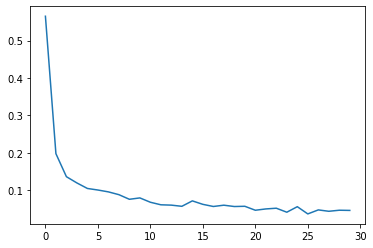

In [33]:
plt.plot(loss_list)

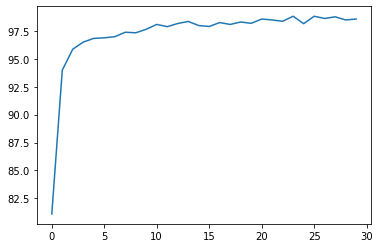

In [34]:
plt.plot(accuracy_list)

In [35]:
test_accuracy = 0

with torch.no_grad():
    for i, (X_test, y_test) in enumerate(test_loader):
        y_val = model(X_test)
        
        predicted = torch.max(y_val.data,1)[1]
        test_accuracy += (predicted == y_test).sum()
        print(f'{test_accuracy.item()*100/len(y_test)}%')

98.17%
